## Picard-Lindelof Theorem

Picard-Lindeolf theorem states the uniqueness of the solution of the following initial value problem
$$ \dot{x} = f(t,x), \qquad x(t_0) = a$$
It uses the idea of contraction mapping on the space of continuos functions. By the contraction mapping principle, any contraction mapping defined on a complete metric space, has a unique fixed point in that space. The transformations proposed for this was
$$ T(x)(t) = a + \int_{t_0}^{t} f(s,x(s)) ds$$
In this code here, I am showing the evolution of the function sequence $\{x_k(t)\}_k$ where
$$x_{k+1} = a + \int_{t_0}^{t} f(s,x_k(s)) ds$$

The initial value problem that I am solving is
$$\ddot{x} = -x,\qquad x(0)=1,\ \dot{x}(0)=0.$$

Obviously, I have first tunred this equation to a first order equation and then used the Picard iteration to produce the sequence of functions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [562]:
class ODESystem:
    def __init__(self):
        self.mat = np.array([[0,1],[-1,0]])*3
        self.nSteps = 800
        self.tList = np.linspace(0,6,self.nSteps)
        self.dt = self.tList[1] - self.tList[0]
        self.a = np.array([1,0]).reshape((2,1))
        self.x_0 = np.ones((2,self.tList.shape[0]))*self.a
        self.xList = []
        self.nIterations = 100

    def integrate(self, x):
        result = np.zeros((2,self.tList.shape[0]))
        for i in range(self.tList.shape[0]):
            F = np.matmul(self.mat,x[:,:i])
            #Y = F/(np.sqrt(1+np.linalg.norm(F, axis=0)**2))
            Y = F
            integral = (Y+np.roll(Y,-1, axis=1))/2 * self.dt
            integral = integral[:,:-1]
            #print((np.sum(integral, axis=1).reshape(2,1) + self.a).reshape(-1))
            result[:,i] = (np.sum(integral, axis=1).reshape(2,1) + self.a).reshape(-1)
            
        return result
    
        
        
    def drawframe(self,n):
        x = self.tList
        #print(n)
    #     y1 = np.sin(tList+n)
        y1 = self.xList[int(n)][0,:].T
        y2 = self.xList[int(n)][1,:].T
    #     y1 = np.sin(2 * np.pi * (x - 0.01 * n))

        line1.set_data(x, y1)
        line2.set_data(x, y2)
        #pt1.set_data(y1[0],y2[0])
        txt_title.set_text('Frame = {0:4d}'.format(n))
        return (line1,line2)
            
    def run(self):
        x = np.copy(self.x_0)
        for i in range(self.nIterations):
            x = self.integrate(x)
            self.xList.append(x)
            
        return self.tList, self.xList
    


In [563]:
sys = ODESystem()
tList, xList = sys.run()
# anim = sys.animate()
# HTML(anim.to_html5_video())


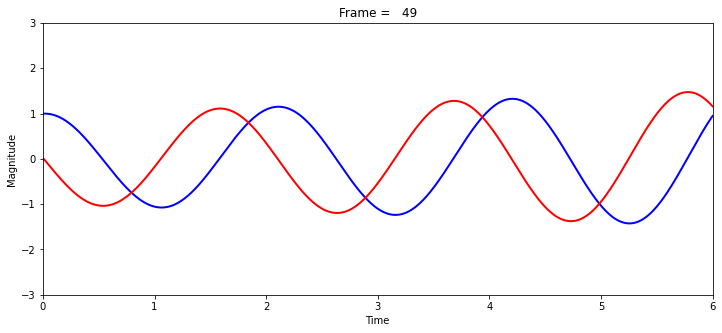

In [568]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)   
# ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 6))            
ax1.set_ylim((-3, 3))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

# ax2.set_xlim((-2,2))
# ax2.set_ylim((-2,2))
# ax2.set_xlabel('X')
# ax2.set_ylabel('Y')
# ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([],[], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([],[], 'r', lw=2)
#line2, = ax1.plot([], [], 'r', lw=2)
# pt1, = ax2.plot([], [], 'g.', ms=20)
# line3, = ax2.plot([], [], 'y', lw=2)

#ax1.legend(['sin','cos']);
anim = animation.FuncAnimation(fig, sys.drawframe, frames=50, interval=100, blit=True)
HTML(anim.to_html5_video())

In [539]:
A = np.array([[3,12],[4,5]])
A / np.linalg.norm(A,axis=0)

array([[0.6       , 0.92307692],
       [0.8       , 0.38461538]])

In [540]:
A

array([[ 3, 12],
       [ 4,  5]])